<a href="https://colab.research.google.com/github/mmkk0744/DGB_Final_project/blob/main/LTV_%EC%B9%B4%EB%93%9C%ED%98%9C%ED%83%9D%EB%B3%84%EA%B3%84%EC%82%B0_%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 고객 10% 추출하여진행

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DGB_최종프로젝트/이민상필터링.csv')
data

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000
1,202112,3205011838,일반한식,경상북도,경주시,5번이하,20000
2,202112,9444540701,일반한식,경상북도,영천시,5번이하,20000
3,202112,8322079028,미용원,대구광역시,남구,5번이하,30000
4,202112,5792289967,기타레져업소,대구광역시,달서구,5번이하,10000
...,...,...,...,...,...,...,...
18802019,202301,3998434590,편 의 점,대구광역시,수성구,5번이하,10000
18802020,202301,4071481711,편 의 점,대구광역시,수성구,5번이하,20000
18802021,202301,3779217490,편 의 점,대구광역시,수성구,5번이하,20000
18802022,202301,7752509063,일반한식,경상북도,구미시,5번이하,150000


In [ ]:
a = pd.read_csv('/content/drive/MyDrive/DGB_최종프로젝트/이민상필터링.csv')
a

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000
1,202112,3205011838,일반한식,경상북도,경주시,5번이하,20000
2,202112,9444540701,일반한식,경상북도,영천시,5번이하,20000
3,202112,8322079028,미용원,대구광역시,남구,5번이하,30000
4,202112,5792289967,기타레져업소,대구광역시,달서구,5번이하,10000
...,...,...,...,...,...,...,...
18802019,202301,3998434590,편 의 점,대구광역시,수성구,5번이하,10000
18802020,202301,4071481711,편 의 점,대구광역시,수성구,5번이하,20000
18802021,202301,3779217490,편 의 점,대구광역시,수성구,5번이하,20000
18802022,202301,7752509063,일반한식,경상북도,구미시,5번이하,150000


In [ ]:
df = a.copy()

In [ ]:
# 카테고리 매핑 정의
category_mapping = {
    '할인': {
        '음식': [
            '정육점', '스넥', '제과점', '기타음료식품', '농·축·수산품', '홍삼제품',
            '기타건강식품', '인삼제품', '위탁급식업', '일반한식', '갈비전문점', '한정식', '중국식', '일식·회집', '서양음식', '주류판매점'
        ],
        '대중교통': [
            '택시', '철도', '고속버스', '택시회사'
        ],
        '주유할인': [
            'SK주유소', 'GS주유소', '쌍용S-OIL',
            '현대정유(오일뱅크)', 'LPG취급점', '전기차충전소', '유류판매', 'E1가스충전소',
            'SK가스충전소', '현대정유가스충전소', '주유소', 'GS가스충전소', '쌍용S-OIL가스충전소'
        ],
        '의료': [
            '종합병원', '치과의원', '치과병원', '한방병원', '의원', '의 원',
            '건강진단', '약 국', '한약방', '의료용품', '기타의료기관 및 기타의료기기', '한 의 원', '병 원(응급실운영)'
        ],
        '레저/스포츠': [
            '골프경기장', '스크린골프', '볼링장', '수영장', '당구장', '골프연습장',
            '헬스클럽', '안마/스포츠마사지', '스포츠·레져용품',
            '종합레져타운', '레져업소', '기타레져업소', '볼 링 장', '수 영 장',
            '골프용품 전문점'
        ],
        '온라인쇼핑': [
            '인터넷Mall', 'CATV홈쇼핑', '통신판매업1', '인터넷P/G', '인터넷종합Mall', '일반(통신판매)',
            'PG상품권'
        ],
        '오프라인쇼핑': [
            '슈퍼마켓', '편의점', '농협하나로클럽', '농,축협직영매장', '화원',
            '가전제품', '컴퓨터', '통신기기', '사무용 OA기기', '문구용품',
            '주방용구', '주방용식기', '편 의 점', '안경', '기타유통업', '일반가구', '자사카드발행백화점',
            '미용재료', '기타 사무용품', '기념품점', '기타잡화', '정장', '스포츠의류', '아동의류', '신발', '맞춤복점',
            '화장품', '귀금속', '대형할인점', '면 세 점', '침구·수예점',
            '기타의류', '가 방', '신 발', '옷감·직물', '카페트,커튼,천막,지물', '기타가구', '액세서리',
            '내의판매', '단체복', '연 쇄 점', '캐주얼의류', '제 화', '비씨카드 정산용가맹점', '비씨카드 정산용(할인)'
        ],
        '교육': [
            '보습학원', '예·체능계학원', '기능학원', '외국어학원', '초중고교육기관',
            '유아원', '독서실', '학습지교육', '기타 교육기관', '학원'
        ],
        '금융/보험': ['손해보험', '생명보험', '기타보험'],
        '공공서비스': [
            '공공요금대행서비스/소득공제대상', '공공요금대행서비스/소득공제비대상',
            '비영리/대상', '비영리/비대상', '통신서비스/소득공제비대상'
        ],
        '통신': ['이동통신요금'],
        '여행': [
            '특급호텔', '1급 호텔', '2급 호텔', '여관', '모텔', '콘도', '관광여행',
            '기타숙박업', '여객선', '렌터카', '항공사'
        ],
        '문화': [
            '서점', '영화관', '티켓', '민예·공예품', '화방·표구점', '전문서적',
            '일반서적', '문화취미기타', '출판 및 인쇄물', '기타서적문구', '완구점', '시 계', '음반영상물'
        ]
    },
    '미할인': {
        '유흥': [
            '주점', '유흥주점', '단란주점', '칵테일바', '스파', '사우나', '노 래 방'
        ],
        '서비스_실용': [
            '세탁소', '가정용품수리', '주차장', '기타수리서비스', '기타용역서비스',
            '보관및 창고업', '혼례서비스업', '정수기', '가례서비스업', '사무서비스', '종합용역',
            '미용원', '이용원', '기타대인서비스', '조세서비스', '위성방송', 'CATV'
        ],
        '서비스_감성': [
            '피부미용실', '인테리어전문'
        ],
        '반려동물': ['애완동물', '동물병원', '수족관'],
        '부동산/건축': [
            '부동산중개·임대', '페인트', '조명기구', '목재·석재·철물', '건축용 요업제품',
            '냉열기기', '보일러·펌프·샷시', '기타건축자재'
        ],
        '기계/공구': ['기계공구', '카인테리어', '기타전기제품', 'DP&E'],
        '기타': [
            '업종미등록', '기타잡화', '기타1', '기타4', '기타 전문점', '소프트웨어', '사무·통신기기수리', '자동차부품', '가타자동차서비스',
            '세차장', '자동차정비', '자동차시트·타이어', '윤활유전문판매', '화물운송', '상품권전문판매', '상 품 권', '전자상거래상품권',
            '전자상거래상품권전문판매', '이륜차판매', '구내매점(국가기관등)'
        ],
        '농업/농자재': [
            '농기계', '비료,사료,종자', '농축수산가공품', '미곡상', '기타농업관련'
        ]
    }
}
# 카테고리 매핑을 데이터프레임으로 변환
category_mapping_df = pd.DataFrame(
    [
        {'대분류': main_category, '세분류': sub_category, '가맹점업종명': industry}
        for main_category, sub_categories in category_mapping.items()
        for sub_category, industry_list in sub_categories.items()
        for industry in industry_list
    ]
)

# 데이터프레임과 매핑 데이터프레임 병합
df = df.merge(category_mapping_df, how='left', on='가맹점업종명')
df

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,대분류,세분류
0,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,할인,음식
1,202112,3205011838,일반한식,경상북도,경주시,5번이하,20000,할인,음식
2,202112,9444540701,일반한식,경상북도,영천시,5번이하,20000,할인,음식
3,202112,8322079028,미용원,대구광역시,남구,5번이하,30000,미할인,서비스_실용
4,202112,5792289967,기타레져업소,대구광역시,달서구,5번이하,10000,할인,레저/스포츠
...,...,...,...,...,...,...,...,...,...
18942441,202301,3998434590,편 의 점,대구광역시,수성구,5번이하,10000,할인,오프라인쇼핑
18942442,202301,4071481711,편 의 점,대구광역시,수성구,5번이하,20000,할인,오프라인쇼핑
18942443,202301,3779217490,편 의 점,대구광역시,수성구,5번이하,20000,할인,오프라인쇼핑
18942444,202301,7752509063,일반한식,경상북도,구미시,5번이하,150000,할인,음식


In [ ]:
df.isnull().sum()

,0
거래년월,0
고객ID,0
가맹점업종명,0
가맹점_광역시도,0
가맹점_시군구,9247
승인건수,0
승인금액,0
대분류,0
세분류,0


In [ ]:
cat_df = df.copy()

In [ ]:
cat_df.head()

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,대분류,세분류
0,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,할인,음식
1,202112,3205011838,일반한식,경상북도,경주시,5번이하,20000,할인,음식
2,202112,9444540701,일반한식,경상북도,영천시,5번이하,20000,할인,음식
3,202112,8322079028,미용원,대구광역시,남구,5번이하,30000,미할인,서비스_실용
4,202112,5792289967,기타레져업소,대구광역시,달서구,5번이하,10000,할인,레저/스포츠


In [ ]:
# 전월실적 열 생성
# 모든 거래년월에 대해 전월 데이터로 기준을 확장
cat_df['전월'] = cat_df['거래년월'].apply(lambda x: x - 1 if (x % 100) > 1 else x - 89)

# 고객ID와 전월 데이터 기준으로 승인금액 합계를 구한 데이터프레임 생성
prev_month = (
    cat_df.groupby(['고객ID', '거래년월'])['승인금액']
    .sum()
    .reset_index()
    .rename(columns={'승인금액': '전월실적', '거래년월': '전월'})
)

# 전월실적을 병합
cat_df = cat_df.merge(prev_month, on=['고객ID', '전월'], how='left')
cat_df

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,대분류,세분류,전월,전월실적
0,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,할인,음식,202111,210000.0
1,202112,3205011838,일반한식,경상북도,경주시,5번이하,20000,할인,음식,202111,570000.0
2,202112,9444540701,일반한식,경상북도,영천시,5번이하,20000,할인,음식,202111,2300000.0
3,202112,8322079028,미용원,대구광역시,남구,5번이하,30000,미할인,서비스_실용,202111,210000.0
4,202112,5792289967,기타레져업소,대구광역시,달서구,5번이하,10000,할인,레저/스포츠,202111,910000.0
...,...,...,...,...,...,...,...,...,...,...,...
18942441,202301,3998434590,편 의 점,대구광역시,수성구,5번이하,10000,할인,오프라인쇼핑,202212,870000.0
18942442,202301,4071481711,편 의 점,대구광역시,수성구,5번이하,20000,할인,오프라인쇼핑,202212,660000.0
18942443,202301,3779217490,편 의 점,대구광역시,수성구,5번이하,20000,할인,오프라인쇼핑,202212,620000.0
18942444,202301,7752509063,일반한식,경상북도,구미시,5번이하,150000,할인,음식,202212,460000.0


In [ ]:
cat_df[(cat_df['고객ID'] == 2914424833) & (cat_df['거래년월'] == 202112)]

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,대분류,세분류,전월,전월실적
0,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,할인,음식,202111,210000.0
34298,202112,2914424833,슈퍼마켓,경상북도,경산시,5번이하,20000,할인,오프라인쇼핑,202111,210000.0
50453,202112,2914424833,슈퍼마켓,경상북도,경주시,5번이하,20000,할인,오프라인쇼핑,202111,210000.0
82140,202112,2914424833,택시,서울특별시,중구,5번이하,10000,할인,대중교통,202111,210000.0
106300,202112,2914424833,슈퍼마켓,경상북도,경산시,5번이하,60000,할인,오프라인쇼핑,202111,210000.0
122025,202112,2914424833,택시,대구광역시,수성구,5번이하,20000,할인,대중교통,202111,210000.0
124311,202112,2914424833,택시,서울특별시,중구,5번이하,20000,할인,대중교통,202111,210000.0
128424,202112,2914424833,일반한식,경상북도,경산시,5번이하,50000,할인,음식,202111,210000.0
144213,202112,2914424833,일반한식,경상북도,경주시,5번이하,60000,할인,음식,202111,210000.0
145314,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,할인,음식,202111,210000.0


In [ ]:
cat_df[(cat_df['고객ID'] == 2914424833) & (cat_df['거래년월'] == 202111)]['승인금액'].sum()

210000

In [ ]:
print(cat_df['전월실적'].isnull().sum())
print(len(cat_df[cat_df['거래년월'] == 202101]))

997522
458826


# 전월실적 결측치 값 확인

In [ ]:
cat_df[cat_df['전월실적'].isnull()]['거래년월'].value_counts().sort_index()

,count
거래년월,
202101,458826
202102,14886
202103,17653
202104,15627
202105,15222
202106,13847
202107,14370
202108,13298
202109,29718


In [ ]:
cat_df['전월실적'].fillna(0, inplace = True)

<ipython-input-17-709a6249f182>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_df['전월실적'].fillna(0, inplace = True)


In [ ]:
cat_df.isnull().sum()

,0
거래년월,0
고객ID,0
가맹점업종명,0
가맹점_광역시도,0
가맹점_시군구,9247
승인건수,0
승인금액,0
대분류,0
세분류,0
전월,0


In [ ]:
cat_df

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,대분류,세분류,전월,전월실적
0,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,할인,음식,202111,210000.0
1,202112,3205011838,일반한식,경상북도,경주시,5번이하,20000,할인,음식,202111,570000.0
2,202112,9444540701,일반한식,경상북도,영천시,5번이하,20000,할인,음식,202111,2300000.0
3,202112,8322079028,미용원,대구광역시,남구,5번이하,30000,미할인,서비스_실용,202111,210000.0
4,202112,5792289967,기타레져업소,대구광역시,달서구,5번이하,10000,할인,레저/스포츠,202111,910000.0
...,...,...,...,...,...,...,...,...,...,...,...
18942441,202301,3998434590,편 의 점,대구광역시,수성구,5번이하,10000,할인,오프라인쇼핑,202212,870000.0
18942442,202301,4071481711,편 의 점,대구광역시,수성구,5번이하,20000,할인,오프라인쇼핑,202212,660000.0
18942443,202301,3779217490,편 의 점,대구광역시,수성구,5번이하,20000,할인,오프라인쇼핑,202212,620000.0
18942444,202301,7752509063,일반한식,경상북도,구미시,5번이하,150000,할인,음식,202212,460000.0


In [ ]:
result_df = cat_df.groupby(['고객ID', '거래년월', '대분류', '세분류']).agg(
    승인금액합계=('승인금액', 'sum'),  # 승인금액 합계
    전월실적=('전월실적', 'mean')  # 전월실적
).reset_index()

result_df

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적
0,2006152542,202312,할인,음식,60000,0.0
1,2010237971,202312,할인,오프라인쇼핑,60000,0.0
2,2010237971,202312,할인,온라인쇼핑,20000,0.0
3,2010237971,202312,할인,음식,100000,0.0
4,2011335858,202312,할인,대중교통,80000,0.0
...,...,...,...,...,...,...
6918471,9999887084,202310,할인,오프라인쇼핑,120000,340000.0
6918472,9999887084,202310,할인,의료,190000,340000.0
6918473,9999887084,202311,할인,온라인쇼핑,50000,310000.0
6918474,9999887084,202311,할인,음식,30000,310000.0


# iM뱅크 기존 카드 할인혜택 적용

In [ ]:
# 할인 규칙 정의
discount_rules = {
    '온라인쇼핑': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '배달앱': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '커피': {'할인율': 0.1, '한도_30만원': 4000, '한도_60만원': 8000},
    '편의점': {'할인율': 0.1, '한도_30만원': 3000, '한도_60만원': 6000},
    '이동통신': {'할인율': 0.1, '한도_30만원': 3000, '한도_60만원': 6000}
}

# 세분류와 할인 규칙 매핑
category_mapping = {
    '온라인쇼핑': '온라인쇼핑',
    '음식': '배달앱',
    '커피': '커피',
    '오프라인쇼핑': '편의점',
    '통신': '이동통신',
    '대중교통': '이동통신'  # 필요에 따라 추가 가능
}

# 매핑된 대분류 열 추가
result_df['할인카테고리'] = result_df['세분류'].map(category_mapping)

# 전월실적 기준으로 월 할인한도 결정
def determine_discount_limit(row):
    if row['할인카테고리'] in discount_rules:
        if row['전월실적'] >= 600000:
            return discount_rules[row['할인카테고리']]['한도_60만원']
        elif row['전월실적'] >= 300000:
            return discount_rules[row['할인카테고리']]['한도_30만원']
    return 0

result_df['월_할인한도'] = result_df.apply(lambda row: determine_discount_limit(row), axis=1)

# 승인금액별 할인 계산
def calculate_discount(row):
    if row['할인카테고리'] in discount_rules:
        discount_rate = discount_rules[row['할인카테고리']]['할인율']
        discount_amount = row['승인금액합계'] * discount_rate
        return min(discount_amount, row['월_할인한도'])
    return 0

result_df['할인혜택'] = result_df.apply(calculate_discount, axis=1)
result_df

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적,할인카테고리,월_할인한도,할인혜택
0,2006152542,202312,할인,음식,60000,0.0,배달앱,0,0.0
1,2010237971,202312,할인,오프라인쇼핑,60000,0.0,편의점,0,0.0
2,2010237971,202312,할인,온라인쇼핑,20000,0.0,온라인쇼핑,0,0.0
3,2010237971,202312,할인,음식,100000,0.0,배달앱,0,0.0
4,2011335858,202312,할인,대중교통,80000,0.0,이동통신,0,0.0
...,...,...,...,...,...,...,...,...,...
6918471,9999887084,202310,할인,오프라인쇼핑,120000,340000.0,편의점,3000,3000.0
6918472,9999887084,202310,할인,의료,190000,340000.0,NaN,0,0.0
6918473,9999887084,202311,할인,온라인쇼핑,50000,310000.0,온라인쇼핑,5000,5000.0
6918474,9999887084,202311,할인,음식,30000,310000.0,배달앱,5000,3000.0


In [ ]:
default_df = result_df.groupby(['고객ID', '거래년월'])[['승인금액합계', '할인혜택']].sum().reset_index()
default_df['전체승인금액'] = default_df['승인금액합계'] - default_df['할인혜택']

default_df

,고객ID,거래년월,승인금액합계,할인혜택,전체승인금액
0,2006152542,202312,60000,0.0,60000.0
1,2010237971,202312,180000,0.0,180000.0
2,2011335858,202312,170000,0.0,170000.0
3,2011450355,202312,360000,0.0,360000.0
4,2012429518,202312,40000,0.0,40000.0
...,...,...,...,...,...
1937951,9999887084,202307,390000,4000.0,386000.0
1937952,9999887084,202308,430000,3000.0,427000.0
1937953,9999887084,202309,340000,5000.0,335000.0
1937954,9999887084,202310,310000,3000.0,307000.0


In [ ]:
default_df[(default_df['고객ID'] == 9999887084) & (default_df['거래년월'] == 202102)]

,고객ID,거래년월,승인금액합계,할인혜택,전체승인금액
1937924,9999887084,202102,560000,18000.0,542000.0


In [ ]:
result_df[(result_df['고객ID'] == 9999887084) & (result_df['거래년월'] == 202102)]

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적,할인카테고리,월_할인한도,할인혜택
6918396,9999887084,202102,할인,오프라인쇼핑,50000,630000.0,편의점,6000,5000.0
6918397,9999887084,202102,할인,음식,310000,630000.0,배달앱,10000,10000.0
6918398,9999887084,202102,할인,의료,170000,630000.0,NaN,0,0.0
6918399,9999887084,202102,할인,통신,30000,630000.0,이동통신,6000,3000.0


In [ ]:
default_df

,고객ID,거래년월,승인금액합계,할인혜택,전체승인금액
0,2006152542,202312,60000,0.0,60000.0
1,2010237971,202312,180000,0.0,180000.0
2,2011335858,202312,170000,0.0,170000.0
3,2011450355,202312,360000,0.0,360000.0
4,2012429518,202312,40000,0.0,40000.0
...,...,...,...,...,...
1937951,9999887084,202307,390000,4000.0,386000.0
1937952,9999887084,202308,430000,3000.0,427000.0
1937953,9999887084,202309,340000,5000.0,335000.0
1937954,9999887084,202310,310000,3000.0,307000.0


In [ ]:
print(default_df['전체승인금액'].sum())
print(default_df['승인금액합계'].sum())

1011436279000.0
1024293920000


# iM뱅크 기존카드 LTV 적용

In [ ]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00


In [ ]:
import warnings
import os
import numpy as np
import matplotlib.pyplot as plt
import math

from datetime import datetime
from datetime import timedelta

from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes.fitters.gamma_gamma_fitter import GammaGammaFitter

from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, space_eval, Trials

warnings.filterwarnings('ignore')

# 지수 표기법 비활성화
pd.options.display.float_format = '{:.5f}'.format
# pd.set_option('display.max_rows', None)

In [ ]:
df1 = default_df.copy()

In [ ]:
df1.head()

,고객ID,거래년월,승인금액합계,할인혜택,전체승인금액
0,2006152542,202312,60000,0.00000,60000.00000
1,2010237971,202312,180000,0.00000,180000.00000
2,2011335858,202312,170000,0.00000,170000.00000
3,2011450355,202312,360000,0.00000,360000.00000
4,2012429518,202312,40000,0.00000,40000.00000


In [ ]:
df1['거래일자'] = pd.to_datetime(df1['거래년월'], format='%Y%m')

current_date = df1['거래일자'].max()

metrics_df = summary_data_from_transaction_data(df1
                                          , customer_id_col = '고객ID'
                                          , datetime_col = '거래일자'
                                          , monetary_value_col='전체승인금액'
                                          , observation_period_end=current_date)

metrics_df

,frequency,recency,T,monetary_value
고객ID,,,,
2006152542,0.00000,0.00000,0.00000,0.00000
2010237971,0.00000,0.00000,0.00000,0.00000
2011335858,0.00000,0.00000,0.00000,0.00000
2011450355,0.00000,0.00000,0.00000,0.00000
2012429518,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...
9999565916,1.00000,28.00000,1033.00000,300000.00000
9999602680,22.00000,1064.00000,1064.00000,215954.54545
9999704899,34.00000,1064.00000,1064.00000,126970.58824


In [ ]:
# 문자열을 datetime으로 변환 (1일을 기본값으로 설정)
current_date = '2023-12-31'
current_date = datetime.strptime(current_date, '%Y-%m-%d')  # 문자열을 datetime으로 변환

# holdout_days 만큼 이전 날짜 계산
holdout_days = 365
calibration_end_date = current_date - timedelta(days=holdout_days)

metrics_cal_df = calibration_and_holdout_data(df1
                                          ,customer_id_col = '고객ID'
                                          ,datetime_col = '거래일자'
                                          ,calibration_period_end=calibration_end_date # train 데이터 기간
                                          ,observation_period_end=current_date         # 끝 기간
                                          ,monetary_value_col='전체승인금액')

metrics_cal_df

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
고객ID,,,,,,,
2494213057,0.00000,0.00000,30.00000,0.00000,12.00000,242500.00000,365.00000
2495222101,0.00000,0.00000,30.00000,0.00000,9.00000,404888.88889,365.00000
2498026032,0.00000,0.00000,30.00000,0.00000,11.00000,207545.45455,365.00000
2502877968,0.00000,0.00000,30.00000,0.00000,7.00000,135428.57143,365.00000
2504456033,0.00000,0.00000,30.00000,0.00000,12.00000,244750.00000,365.00000
...,...,...,...,...,...,...,...
9999565916,1.00000,28.00000,698.00000,300000.00000,0.00000,0.00000,365.00000
9999602680,10.00000,699.00000,729.00000,176000.00000,12.00000,249250.00000,365.00000
9999704899,22.00000,699.00000,729.00000,93636.36364,12.00000,188083.33333,365.00000


In [ ]:
## frequency가 0인 것은 제외하기
whole_filtered_df = metrics_df[metrics_df.frequency > 0]
filtered_df       = metrics_cal_df[metrics_cal_df.frequency_cal > 0]

In [ ]:
# 평가 지표: default는 MSE
def score_model(actuals, predicted, metric='mse'):

    metric = metric.lower()

    # MSE / RMSE
    if metric=='mse' or metric=='rmse':
        val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    elif metric=='rmse':
        val = np.sqrt(val)
    # MAE
    elif metric=='mae':
        val = np.sum(np.abs(actuals-predicted))/actuals.shape[0]
    else:
        val = None

    return val

# BG/NBD 모형 평가
def evaluate_bgnbd_model(param):

    data   = inputs
    l2_reg = param

    # 모형 적합
    model = BetaGeoFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])

    # 모형 평가
    frequency_actual = data['frequency_holdout']
    frequency_predicted = model.predict(data['duration_holdout']
                                        , data['frequency_cal']
                                        , data['recency_cal']
                                        , data['T_cal']
                                       )
    mse = score_model(frequency_actual, frequency_predicted, 'mse')

    return {'loss': mse, 'status': STATUS_OK}

# Gamma/Gamma 모델 평가
def evaluate_gg_model(param):
    data   = inputs[inputs['monetary_value_cal'] > 0]  # 0 이하의 값 필터링
    l2_reg = param

    # GammaGamma 모형 적합
    model = GammaGammaFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['monetary_value_cal'])

    # 모형 평가
    monetary_actual = data['monetary_value_holdout']
    monetary_predicted = model.conditional_expected_average_profit(data['frequency_holdout'], data['monetary_value_holdout'])
    mse = score_model(monetary_actual, monetary_predicted, 'mse')

    # return score and status
    return {'loss': mse, 'status': STATUS_OK}

In [ ]:
search_space = hp.uniform('l2', 0.0, 1)
algo = tpe.suggest
trials = Trials()
inputs = filtered_df

argmin = fmin(
  fn = evaluate_bgnbd_model, # 목적함수
  space = search_space,      # 파라미터 공간
  algo = algo,               # 최적화 알고리즘: Tree of Parzen Estimators (TPE)
  max_evals=100,             # 반복수
  trials=trials
  )

l2_bgnbd = space_eval(search_space,argmin)
print(l2_bgnbd)

100%|██████████| 100/100 [02:06<00:00,  1.27s/trial, best loss: 9.24686720584386]
0.007349414397960663


In [ ]:
trials = Trials()
search_space = hp.uniform('l2', 0.001, 0.05)

# GammaGamma
argmin = fmin(
  fn = evaluate_gg_model,
  space = search_space,
  algo = algo,
  max_evals=100,
  trials=trials
  )

l2_gg = space_eval(search_space,argmin)
print(l2_gg)

100%|██████████| 100/100 [00:53<00:00,  1.87trial/s, best loss: 246902165.1007891]
0.001034739689003


In [ ]:
lifetimes_model = BetaGeoFitter(penalizer_coef=l2_bgnbd) #l2_bgnbd = hyperopt로 나온 결과 / 값이 커지면 커질 수록 왼쪽으로 밀린다
# calibration 데이터의 R,F,T로 모형 적합
lifetimes_model.fit(filtered_df['frequency_cal'], filtered_df['recency_cal'], filtered_df['T_cal'])

# holdout 데이터로 모델 평가: F의 실제값과 예측값의 MSE
frequency_actual = filtered_df['frequency_holdout']
frequency_predicted = lifetimes_model.predict(filtered_df['duration_holdout']
                                    ,filtered_df['frequency_cal']
                                    , filtered_df['recency_cal']
                                    , filtered_df['T_cal'])

mse = score_model(frequency_actual, frequency_predicted, 'mse')
print('MSE: {0}'.format(mse))

MSE: 9.24686720584386


In [ ]:
lifetimes_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,3.57375,0.01726,3.53991,3.60758
alpha,143.86978,0.75052,142.39877,145.34079
a,0.03843,0.00060,0.03725,0.03960
b,0.86109,0.01607,0.82959,0.89259


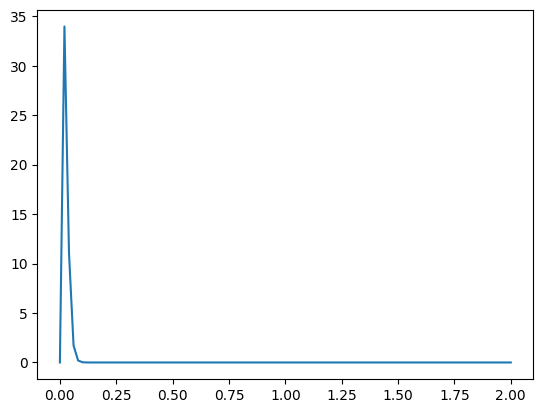

In [ ]:
# 고객별 lambda (구매율) 의 분포
from scipy.stats import gamma
import matplotlib.pyplot as plt

coefs = lifetimes_model.summary['coef']
x = np.linspace (0, 2, 100)
y = gamma.pdf(x, a=coefs['r'], scale=1/coefs['alpha']) # BG/NBD에서의 모수 alpha는 scale 모수가 아닌 rate 모수이므로 역수!

plt.plot(x, y)

In [ ]:
filtered_df

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
고객ID,,,,,,,
2532044234,1.00000,30.00000,60.00000,350000.00000,10.00000,277800.00000,365.00000
2532363417,1.00000,30.00000,60.00000,930000.00000,6.00000,143666.66667,365.00000
2535752956,1.00000,30.00000,60.00000,2281000.00000,12.00000,1554666.66667,365.00000
2537692434,1.00000,30.00000,60.00000,550000.00000,12.00000,619083.33333,365.00000
2537732059,1.00000,30.00000,60.00000,160000.00000,8.00000,554125.00000,365.00000
...,...,...,...,...,...,...,...
9999565916,1.00000,28.00000,698.00000,300000.00000,0.00000,0.00000,365.00000
9999602680,10.00000,699.00000,729.00000,176000.00000,12.00000,249250.00000,365.00000
9999704899,22.00000,699.00000,729.00000,93636.36364,12.00000,188083.33333,365.00000


In [ ]:
spend_model = GammaGammaFitter(penalizer_coef = l2_gg) # 값이 내려가면 마이너스 문제는 해결
spend_model.fit(filtered_df['frequency_cal'], filtered_df['monetary_value_cal'])

# conditional_expected_average_profit: 고객별 평균 구매 금액 예측
monetary_actual = filtered_df['monetary_value_holdout']
monetary_predicted = spend_model.conditional_expected_average_profit(filtered_df['frequency_holdout']
                                                                    ,filtered_df['monetary_value_holdout'])

mse = score_model(monetary_actual, monetary_predicted, 'mse')

print('MSE: {0}'.format(mse))

MSE: 246902165.1007891


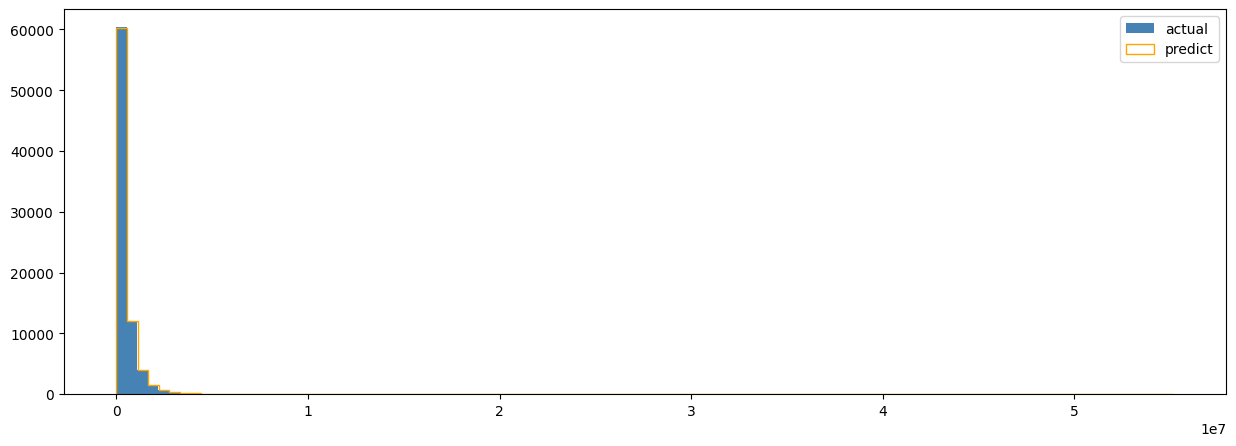

In [ ]:
bins = 100
plt.figure(figsize=(15, 5))

plt.hist(monetary_actual, bins, label='actual', histtype='bar', color='STEELBLUE', rwidth=0.99)
plt.hist(monetary_predicted, bins, label='predict', histtype='step', color='ORANGE',  rwidth=0.99)
plt.legend(loc='upper right')

In [ ]:
final_df = whole_filtered_df.copy()

final_df['ltv'] = spend_model.customer_lifetime_value(lifetimes_model,
                                                     final_df['frequency'],
                                                     final_df['recency'],
                                                     final_df['T'],
                                                     final_df['monetary_value'],
                                                     time = 36,
                                                     discount_rate = 0
                                                     )

final_df = final_df.reset_index()
final_df

,고객ID,frequency,recency,T,monetary_value,ltv
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22443356.99093
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3647229.59371
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1402915.87464
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7855317.81697
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16552033.47837
...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,4619.07124
85422,9999602680,22.00000,1064.00000,1064.00000,215954.54545,4879344.59892
85423,9999704899,34.00000,1064.00000,1064.00000,126970.58824,4212510.49824
85424,9999822229,10.00000,516.00000,1064.00000,295100.00000,233035.94504


In [ ]:
t =  365

final_df['predicted_purchases'] = lifetimes_model.conditional_expected_number_of_purchases_up_to_time(t
                                                                                      , final_df['frequency']
                                                                                     , final_df['recency']
                                                                                     , final_df['T'])

In [ ]:
final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22443356.99093,8.71838
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3647229.59371,8.71838
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1402915.87464,8.71838
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7855317.81697,8.71838
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16552033.47837,8.71838
...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,4619.07124,0.00471
85422,9999602680,22.00000,1064.00000,1064.00000,215954.54545,4879344.59892,7.66781
85423,9999704899,34.00000,1064.00000,1064.00000,126970.58824,4212510.49824,11.27577
85424,9999822229,10.00000,516.00000,1064.00000,295100.00000,233035.94504,0.26663


In [ ]:
final_df['predicted_monetary_value'] = spend_model.conditional_expected_average_profit(final_df['frequency']
                                                                    ,final_df['monetary_value'])

final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22443356.99093,8.71838,899762.87892
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3647229.59371,8.71838,146218.84777
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1402915.87464,8.71838,56243.44107
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7855317.81697,8.71838,314922.73534
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16552033.47837,8.71838,663577.43632
...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,4619.07124,0.00471,337416.58702
85422,9999602680,22.00000,1064.00000,1064.00000,215954.54545,4879344.59892,7.66781,217048.71016
85423,9999704899,34.00000,1064.00000,1064.00000,126970.58824,4212510.49824,11.27577,127386.20316
85424,9999822229,10.00000,516.00000,1064.00000,295100.00000,233035.94504,0.26663,298409.19093


In [ ]:
final_df['1년예상'] = final_df['predicted_purchases'] * final_df['predicted_monetary_value']
final_df


,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22443356.99093,8.71838,899762.87892,7844475.83883
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3647229.59371,8.71838,146218.84777,1274791.66499
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1402915.87464,8.71838,56243.44107,490351.76364
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7855317.81697,8.71838,314922.73534,2745616.48003
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16552033.47837,8.71838,663577.43632,5785321.09778
...,...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,4619.07124,0.00471,337416.58702,1589.37404
85422,9999602680,22.00000,1064.00000,1064.00000,215954.54545,4879344.59892,7.66781,217048.71016,1664289.20467
85423,9999704899,34.00000,1064.00000,1064.00000,126970.58824,4212510.49824,11.27577,127386.20316,1436377.61938
85424,9999822229,10.00000,516.00000,1064.00000,295100.00000,233035.94504,0.26663,298409.19093,79564.99641


In [ ]:
final_df.describe()


,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상
count,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000
mean,6568289178.37840,21.61444,809.52217,945.14750,427663.53076,11675597.00687,7.60572,431809.12023,3985615.99220
std,2031448736.93000,12.55490,336.57228,233.54726,587299.09557,19290090.01542,4.27356,592149.73699,6582606.43612
min,2045315840.00000,1.00000,28.00000,30.00000,9000.00000,39.92022,0.00134,10010.70025,13.63549
25%,4891759648.50000,9.00000,579.00000,974.00000,111804.54545,1056372.11705,3.80249,113770.22144,361233.31010
50%,6629082544.00000,24.00000,1005.00000,1064.00000,263894.44444,5594847.03858,9.47189,267201.71292,1910758.47392
75%,8303638011.50000,35.00000,1064.00000,1064.00000,534762.50000,15214453.19128,11.57641,539212.80413,5193844.15083
max,9999887084.00000,35.00000,1064.00000,1064.00000,49958571.42857,1701537527.60306,11.57641,50117326.37118,580178553.81478


In [ ]:
final_df = final_df[(final_df['monetary_value'] > 0) & (final_df['frequency'] > 0)]
final_df['Z'] = (final_df['T'] - final_df['recency']) * final_df['frequency'] / final_df['recency']
final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상,Z
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22443356.99093,8.71838,899762.87892,7844475.83883,0.00000
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3647229.59371,8.71838,146218.84777,1274791.66499,0.00000
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1402915.87464,8.71838,56243.44107,490351.76364,0.00000
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7855317.81697,8.71838,314922.73534,2745616.48003,0.00000
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16552033.47837,8.71838,663577.43632,5785321.09778,0.00000
...,...,...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,4619.07124,0.00471,337416.58702,1589.37404,35.89286
85422,9999602680,22.00000,1064.00000,1064.00000,215954.54545,4879344.59892,7.66781,217048.71016,1664289.20467,0.00000
85423,9999704899,34.00000,1064.00000,1064.00000,126970.58824,4212510.49824,11.27577,127386.20316,1436377.61938,0.00000
85424,9999822229,10.00000,516.00000,1064.00000,295100.00000,233035.94504,0.26663,298409.19093,79564.99641,10.62016


In [ ]:
final_df['Z_sigmoid'] = 1 / (1 + np.exp( - (final_df['Z'] - final_df['Z'].mean() )))
final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상,Z,Z_sigmoid
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22443356.99093,8.71838,899762.87892,7844475.83883,0.00000,0.04489
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3647229.59371,8.71838,146218.84777,1274791.66499,0.00000,0.04489
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1402915.87464,8.71838,56243.44107,490351.76364,0.00000,0.04489
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7855317.81697,8.71838,314922.73534,2745616.48003,0.00000,0.04489
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16552033.47837,8.71838,663577.43632,5785321.09778,0.00000,0.04489
...,...,...,...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,4619.07124,0.00471,337416.58702,1589.37404,35.89286,1.00000
85422,9999602680,22.00000,1064.00000,1064.00000,215954.54545,4879344.59892,7.66781,217048.71016,1664289.20467,0.00000,0.04489
85423,9999704899,34.00000,1064.00000,1064.00000,126970.58824,4212510.49824,11.27577,127386.20316,1436377.61938,0.00000,0.04489
85424,9999822229,10.00000,516.00000,1064.00000,295100.00000,233035.94504,0.26663,298409.19093,79564.99641,10.62016,0.99948


In [ ]:
final_df.describe()

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상,Z,Z_sigmoid
count,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000
mean,6568289178.37840,21.61444,809.52217,945.14750,427663.53076,11675597.00687,7.60572,431809.12023,3985615.99220,3.05764,0.25834
std,2031448736.93000,12.55490,336.57228,233.54726,587299.09557,19290090.01542,4.27356,592149.73699,6582606.43612,6.71282,0.36510
min,2045315840.00000,1.00000,28.00000,30.00000,9000.00000,39.92022,0.00134,10010.70025,13.63549,0.00000,0.04489
25%,4891759648.50000,9.00000,579.00000,974.00000,111804.54545,1056372.11705,3.80249,113770.22144,361233.31010,0.00000,0.04489
50%,6629082544.00000,24.00000,1005.00000,1064.00000,263894.44444,5594847.03858,9.47189,267201.71292,1910758.47392,0.00000,0.04489
75%,8303638011.50000,35.00000,1064.00000,1064.00000,534762.50000,15214453.19128,11.57641,539212.80413,5193844.15083,2.00784,0.25926
max,9999887084.00000,35.00000,1064.00000,1064.00000,49958571.42857,1701537527.60306,11.57641,50117326.37118,580178553.81478,35.89286,1.00000


In [ ]:
final_df.to_csv('기존카드_ltv.csv', index = False)

# 개선 카드 할인혜택 적용

In [ ]:
result_df

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적,월_할인한도,할인혜택,할인혜택_total
0,2006152542,202312,할인,음식,60000,0.00000,0,0.00000,0.00000
1,2010237971,202312,할인,오프라인쇼핑,60000,0.00000,0,0.00000,0.00000
2,2010237971,202312,할인,온라인쇼핑,20000,0.00000,0,0.00000,0.00000
3,2010237971,202312,할인,음식,100000,0.00000,0,0.00000,0.00000
4,2011335858,202312,할인,대중교통,80000,0.00000,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...
6918471,9999887084,202310,할인,오프라인쇼핑,120000,340000.00000,5000,5000.00000,10000.00000
6918472,9999887084,202310,할인,의료,190000,340000.00000,5000,5000.00000,10000.00000
6918473,9999887084,202311,할인,온라인쇼핑,50000,310000.00000,5000,5000.00000,13000.00000
6918474,9999887084,202311,할인,음식,30000,310000.00000,5000,3000.00000,13000.00000


In [ ]:
result_df['세분류'].unique()

array(['음식', '오프라인쇼핑', '온라인쇼핑', '대중교통', '의료', '서비스_실용', '레저/스포츠', '문화',
       '기타', '공공서비스', '유흥', '금융/보험', '여행', '주유할인', '기계/공구', '반려동물', '통신',
       '부동산/건축', '서비스_감성', '농업/농자재', '교육'], dtype=object)

In [ ]:
result_df = cat_df.groupby(['고객ID', '거래년월', '대분류', '세분류']).agg(
    승인금액합계=('승인금액', 'sum'),  # 승인금액 합계
    전월실적=('전월실적', 'mean')  # 전월실적
).reset_index()

result_df

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적
0,2006152542,202312,할인,음식,60000,0.00000
1,2010237971,202312,할인,오프라인쇼핑,60000,0.00000
2,2010237971,202312,할인,온라인쇼핑,20000,0.00000
3,2010237971,202312,할인,음식,100000,0.00000
4,2011335858,202312,할인,대중교통,80000,0.00000
...,...,...,...,...,...,...
6918471,9999887084,202310,할인,오프라인쇼핑,120000,340000.00000
6918472,9999887084,202310,할인,의료,190000,340000.00000
6918473,9999887084,202311,할인,온라인쇼핑,50000,310000.00000
6918474,9999887084,202311,할인,음식,30000,310000.00000


In [ ]:
# 새로운 할인 규칙 정의
discount_rules = {
    '음식': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '대중교통': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '주유할인': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '의료': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '레저/스포츠': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '온라인쇼핑': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '오프라인쇼핑': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '교육': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '금융/보험': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '공공서비스': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '통신': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '여행': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
    '문화': {'할인율': 0.1, '한도_30만원': 5000, '한도_60만원': 10000},
}

# 전월실적 기준으로 월 할인한도 결정
def determine_discount_limit(row):
    if row['세분류'] in discount_rules:
        if row['전월실적'] >= 600000:
            return discount_rules[row['세분류']]['한도_60만원']
        elif row['전월실적'] >= 300000:
            return discount_rules[row['세분류']]['한도_30만원']
    return 0

# '월_할인한도' 컬럼 추가
result_df['월_할인한도'] = result_df.apply(lambda row: determine_discount_limit(row), axis=1)

# 승인금액별 할인 계산
def calculate_discount(row):
    if row['세분류'] in discount_rules:
        discount_rate = discount_rules[row['세분류']]['할인율']
        discount_amount = row['승인금액합계'] * discount_rate
        return min(discount_amount, row['월_할인한도'])
    return 0

# '할인혜택' 컬럼 추가
result_df['할인혜택'] = result_df.apply(calculate_discount, axis=1)

# 고객별, 거래년월별 상위 3개의 할인혜택 합산
result_df['할인혜택_total'] = (
    result_df.groupby(['고객ID', '거래년월'])['할인혜택']
    .transform(lambda x: sum(sorted(x, reverse=True)[:3]))
)

# 결과 확인
result_df

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적,월_할인한도,할인혜택,할인혜택_total
0,2006152542,202312,할인,음식,60000,0.00000,0,0.00000,0.00000
1,2010237971,202312,할인,오프라인쇼핑,60000,0.00000,0,0.00000,0.00000
2,2010237971,202312,할인,온라인쇼핑,20000,0.00000,0,0.00000,0.00000
3,2010237971,202312,할인,음식,100000,0.00000,0,0.00000,0.00000
4,2011335858,202312,할인,대중교통,80000,0.00000,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...
6918471,9999887084,202310,할인,오프라인쇼핑,120000,340000.00000,5000,5000.00000,10000.00000
6918472,9999887084,202310,할인,의료,190000,340000.00000,5000,5000.00000,10000.00000
6918473,9999887084,202311,할인,온라인쇼핑,50000,310000.00000,5000,5000.00000,13000.00000
6918474,9999887084,202311,할인,음식,30000,310000.00000,5000,3000.00000,13000.00000


In [ ]:
result_df['할인혜택_total'].max()

30000.0

In [ ]:
result_df[result_df['할인혜택_total'] == 30000]

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적,월_할인한도,할인혜택,할인혜택_total
453,2075601716,202312,미할인,서비스_실용,10000,820000.00000,0,0.00000,30000.00000
454,2075601716,202312,미할인,유흥,30000,820000.00000,0,0.00000,30000.00000
455,2075601716,202312,할인,공공서비스,110000,820000.00000,10000,10000.00000,30000.00000
456,2075601716,202312,할인,대중교통,10000,820000.00000,10000,1000.00000,30000.00000
457,2075601716,202312,할인,레저/스포츠,80000,820000.00000,10000,8000.00000,30000.00000
...,...,...,...,...,...,...,...,...,...
6918153,9999240910,202302,할인,음식,120000,760000.00000,10000,10000.00000,30000.00000
6918154,9999240910,202302,할인,의료,130000,760000.00000,10000,10000.00000,30000.00000
6918436,9999887084,202204,할인,오프라인쇼핑,200000,720000.00000,10000,10000.00000,30000.00000
6918437,9999887084,202204,할인,음식,110000,720000.00000,10000,10000.00000,30000.00000


In [ ]:
result_df[(result_df['고객ID'] == 9999240910) & (result_df['거래년월'] == 202102)]

,고객ID,거래년월,대분류,세분류,승인금액합계,전월실적,월_할인한도,할인혜택,할인혜택_total
6918052,9999240910,202102,미할인,서비스_실용,10000,610000.00000,0,0.00000,20000.00000
6918053,9999240910,202102,할인,공공서비스,10000,610000.00000,10000,1000.00000,20000.00000
6918054,9999240910,202102,할인,오프라인쇼핑,500000,610000.00000,10000,10000.00000,20000.00000
6918055,9999240910,202102,할인,온라인쇼핑,60000,610000.00000,10000,6000.00000,20000.00000
6918056,9999240910,202102,할인,음식,20000,610000.00000,10000,2000.00000,20000.00000
6918057,9999240910,202102,할인,의료,40000,610000.00000,10000,4000.00000,20000.00000


In [ ]:
update_df = result_df.groupby(['고객ID', '거래년월'])[['승인금액합계', '할인혜택']].sum().reset_index()
update_df['전체승인금액'] = update_df['승인금액합계'] - update_df['할인혜택']

update_df

,고객ID,거래년월,승인금액합계,할인혜택,전체승인금액
0,2006152542,202312,60000,0.00000,60000.00000
1,2010237971,202312,180000,0.00000,180000.00000
2,2011335858,202312,170000,0.00000,170000.00000
3,2011450355,202312,360000,0.00000,360000.00000
4,2012429518,202312,40000,0.00000,40000.00000
...,...,...,...,...,...
1937951,9999887084,202307,390000,11000.00000,379000.00000
1937952,9999887084,202308,430000,10000.00000,420000.00000
1937953,9999887084,202309,340000,10000.00000,330000.00000
1937954,9999887084,202310,310000,10000.00000,300000.00000


In [ ]:
a = update_df.groupby(['고객ID', '거래년월'])['승인금액합계'].sum().reset_index()

a.groupby('거래년월')['승인금액합계'].mean()

,승인금액합계
거래년월,
202101,466183.79128
202102,450888.96381
202103,499201.50425
202104,484775.71016
202105,500027.07073
202106,483953.68452
202107,505758.05736
202108,483921.40749
202109,489327.36386


In [ ]:
df1 = update_df.copy()

In [ ]:
df1

,고객ID,거래년월,승인금액합계,할인혜택,전체승인금액
0,2006152542,202312,60000,0.00000,60000.00000
1,2010237971,202312,180000,0.00000,180000.00000
2,2011335858,202312,170000,0.00000,170000.00000
3,2011450355,202312,360000,0.00000,360000.00000
4,2012429518,202312,40000,0.00000,40000.00000
...,...,...,...,...,...
1937951,9999887084,202307,390000,11000.00000,379000.00000
1937952,9999887084,202308,430000,10000.00000,420000.00000
1937953,9999887084,202309,340000,10000.00000,330000.00000
1937954,9999887084,202310,310000,10000.00000,300000.00000


# 개선 카드 할인혜택 적용

In [ ]:
df1['거래일자'] = pd.to_datetime(df1['거래년월'], format='%Y%m')

current_date = df1['거래일자'].max()

metrics_df = summary_data_from_transaction_data(df1
                                          , customer_id_col = '고객ID'
                                          , datetime_col = '거래일자'
                                          , monetary_value_col='전체승인금액'
                                          , observation_period_end=current_date)

metrics_df

,frequency,recency,T,monetary_value
고객ID,,,,
2006152542,0.00000,0.00000,0.00000,0.00000
2010237971,0.00000,0.00000,0.00000,0.00000
2011335858,0.00000,0.00000,0.00000,0.00000
2011450355,0.00000,0.00000,0.00000,0.00000
2012429518,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...
9999565916,1.00000,28.00000,1033.00000,300000.00000
9999602680,22.00000,1064.00000,1064.00000,215000.00000
9999704899,34.00000,1064.00000,1064.00000,126911.76471


In [ ]:
# 문자열을 datetime으로 변환 (1일을 기본값으로 설정)
current_date = '2023-12-31'
current_date = datetime.strptime(current_date, '%Y-%m-%d')  # 문자열을 datetime으로 변환

# holdout_days 만큼 이전 날짜 계산
holdout_days = 365
calibration_end_date = current_date - timedelta(days=holdout_days)

metrics_cal_df = calibration_and_holdout_data(df1
                                          ,customer_id_col = '고객ID'
                                          ,datetime_col = '거래일자'
                                          ,calibration_period_end=calibration_end_date # train 데이터 기간
                                          ,observation_period_end=current_date         # 끝 기간
                                          ,monetary_value_col='전체승인금액')

metrics_cal_df

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
고객ID,,,,,,,
2494213057,0.00000,0.00000,30.00000,0.00000,12.00000,242250.00000,365.00000
2495222101,0.00000,0.00000,30.00000,0.00000,9.00000,403777.77778,365.00000
2498026032,0.00000,0.00000,30.00000,0.00000,11.00000,206727.27273,365.00000
2502877968,0.00000,0.00000,30.00000,0.00000,7.00000,135142.85714,365.00000
2504456033,0.00000,0.00000,30.00000,0.00000,12.00000,243500.00000,365.00000
...,...,...,...,...,...,...,...
9999565916,1.00000,28.00000,698.00000,300000.00000,0.00000,0.00000,365.00000
9999602680,10.00000,699.00000,729.00000,176000.00000,12.00000,247500.00000,365.00000
9999704899,22.00000,699.00000,729.00000,93636.36364,12.00000,187916.66667,365.00000


In [ ]:
## frequency가 0인 것은 제외하기
whole_filtered_df = metrics_df[metrics_df.frequency > 0]
filtered_df       = metrics_cal_df[metrics_cal_df.frequency_cal > 0]

In [ ]:
# 평가 지표: default는 MSE
def score_model(actuals, predicted, metric='mse'):

    metric = metric.lower()

    # MSE / RMSE
    if metric=='mse' or metric=='rmse':
        val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    elif metric=='rmse':
        val = np.sqrt(val)
    # MAE
    elif metric=='mae':
        val = np.sum(np.abs(actuals-predicted))/actuals.shape[0]
    else:
        val = None

    return val

# BG/NBD 모형 평가
def evaluate_bgnbd_model(param):

    data   = inputs
    l2_reg = param

    # 모형 적합
    model = BetaGeoFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['recency_cal'], data['T_cal'])

    # 모형 평가
    frequency_actual = data['frequency_holdout']
    frequency_predicted = model.predict(data['duration_holdout']
                                        , data['frequency_cal']
                                        , data['recency_cal']
                                        , data['T_cal']
                                       )
    mse = score_model(frequency_actual, frequency_predicted, 'mse')

    return {'loss': mse, 'status': STATUS_OK}

# Gamma/Gamma 모델 평가
def evaluate_gg_model(param):
    data   = inputs[inputs['monetary_value_cal'] > 0]  # 0 이하의 값 필터링
    l2_reg = param

    # GammaGamma 모형 적합
    model = GammaGammaFitter(penalizer_coef=l2_reg)
    model.fit(data['frequency_cal'], data['monetary_value_cal'])

    # 모형 평가
    monetary_actual = data['monetary_value_holdout']
    monetary_predicted = model.conditional_expected_average_profit(data['frequency_holdout'], data['monetary_value_holdout'])
    mse = score_model(monetary_actual, monetary_predicted, 'mse')

    # return score and status
    return {'loss': mse, 'status': STATUS_OK}

In [ ]:
search_space = hp.uniform('l2', 0.0, 1)
algo = tpe.suggest
trials = Trials()
inputs = filtered_df

argmin = fmin(
  fn = evaluate_bgnbd_model, # 목적함수
  space = search_space,      # 파라미터 공간
  algo = algo,               # 최적화 알고리즘: Tree of Parzen Estimators (TPE)
  max_evals=100,             # 반복수
  trials=trials
  )

l2_bgnbd = space_eval(search_space,argmin)
print(l2_bgnbd)

100%|██████████| 100/100 [02:06<00:00,  1.26s/trial, best loss: 9.24421904727588]
0.005373082135399511


In [ ]:
trials = Trials()
search_space = hp.uniform('l2', 0.001, 0.05)

# GammaGamma
argmin = fmin(
  fn = evaluate_gg_model,
  space = search_space,
  algo = algo,
  max_evals=100,
  trials=trials
  )

l2_gg = space_eval(search_space,argmin)
print(l2_gg)

100%|██████████| 100/100 [00:53<00:00,  1.87trial/s, best loss: 246024037.0832262]
0.0010367147709032312


In [ ]:
lifetimes_model = BetaGeoFitter(penalizer_coef=l2_bgnbd) #l2_bgnbd = hyperopt로 나온 결과 / 값이 커지면 커질 수록 왼쪽으로 밀린다
# calibration 데이터의 R,F,T로 모형 적합
lifetimes_model.fit(filtered_df['frequency_cal'], filtered_df['recency_cal'], filtered_df['T_cal'])

# holdout 데이터로 모델 평가: F의 실제값과 예측값의 MSE
frequency_actual = filtered_df['frequency_holdout']
frequency_predicted = lifetimes_model.predict(filtered_df['duration_holdout']
                                    ,filtered_df['frequency_cal']
                                    , filtered_df['recency_cal']
                                    , filtered_df['T_cal'])

mse = score_model(frequency_actual, frequency_predicted, 'mse')
print('MSE: {0}'.format(mse))

MSE: 9.24421904727588


In [ ]:
lifetimes_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,3.97927,0.01994,3.94018,4.01836
alpha,159.88680,0.85458,158.21183,161.56178
a,0.04130,0.00064,0.04003,0.04256
b,0.94345,0.01831,0.90757,0.97933


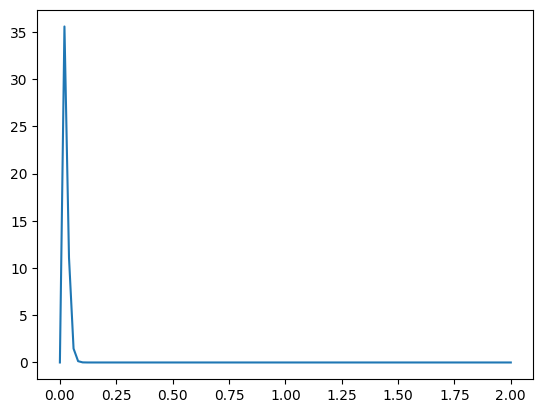

In [ ]:
# 고객별 lambda (구매율) 의 분포
from scipy.stats import gamma
import matplotlib.pyplot as plt

coefs = lifetimes_model.summary['coef']
x = np.linspace (0, 2, 100)
y = gamma.pdf(x, a=coefs['r'], scale=1/coefs['alpha']) # BG/NBD에서의 모수 alpha는 scale 모수가 아닌 rate 모수이므로 역수!

plt.plot(x, y)

In [ ]:
filtered_df

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
고객ID,,,,,,,
2532044234,1.00000,30.00000,60.00000,350000.00000,10.00000,276800.00000,365.00000
2532363417,1.00000,30.00000,60.00000,930000.00000,6.00000,142666.66667,365.00000
2535752956,1.00000,30.00000,60.00000,2259000.00000,12.00000,1540916.66667,365.00000
2537692434,1.00000,30.00000,60.00000,550000.00000,12.00000,609000.00000,365.00000
2537732059,1.00000,30.00000,60.00000,160000.00000,8.00000,551750.00000,365.00000
...,...,...,...,...,...,...,...
9999565916,1.00000,28.00000,698.00000,300000.00000,0.00000,0.00000,365.00000
9999602680,10.00000,699.00000,729.00000,176000.00000,12.00000,247500.00000,365.00000
9999704899,22.00000,699.00000,729.00000,93636.36364,12.00000,187916.66667,365.00000


In [ ]:
spend_model = GammaGammaFitter(penalizer_coef = l2_gg) # 값이 내려가면 마이너스 문제는 해결
spend_model.fit(filtered_df['frequency_cal'], filtered_df['monetary_value_cal'])

# conditional_expected_average_profit: 고객별 평균 구매 금액 예측
monetary_actual = filtered_df['monetary_value_holdout']
monetary_predicted = spend_model.conditional_expected_average_profit(filtered_df['frequency_holdout']
                                                                    ,filtered_df['monetary_value_holdout'])

mse = score_model(monetary_actual, monetary_predicted, 'mse')

print('MSE: {0}'.format(mse))

MSE: 246024037.0832262


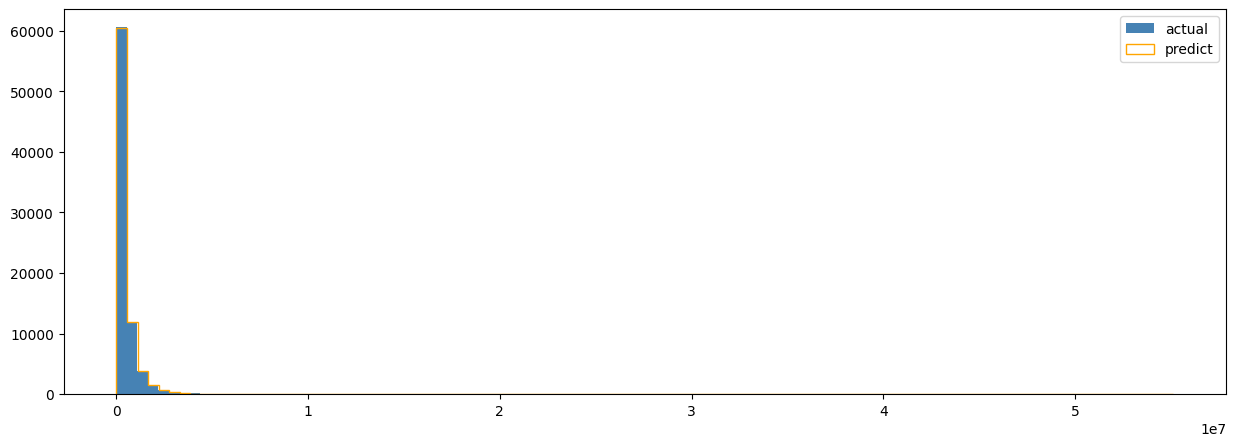

In [ ]:
bins = 100
plt.figure(figsize=(15, 5))

plt.hist(monetary_actual, bins, label='actual', histtype='bar', color='STEELBLUE', rwidth=0.99)
plt.hist(monetary_predicted, bins, label='predict', histtype='step', color='ORANGE',  rwidth=0.99)
plt.legend(loc='upper right')

In [ ]:
final_df = whole_filtered_df.copy()

final_df['ltv'] = spend_model.customer_lifetime_value(lifetimes_model,
                                                     final_df['frequency'],
                                                     final_df['recency'],
                                                     final_df['T'],
                                                     final_df['monetary_value'],
                                                     time = 36,
                                                     discount_rate = 0
                                                     )

final_df = final_df.reset_index()
final_df

,고객ID,frequency,recency,T,monetary_value,ltv
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22302102.32987
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3624274.42626
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1394086.01986
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7805877.68826
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16447857.76306
...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,3372.55079
85422,9999602680,22.00000,1064.00000,1064.00000,215000.00000,4864208.42817
85423,9999704899,34.00000,1064.00000,1064.00000,126911.76471,4195648.12688
85424,9999822229,10.00000,516.00000,1064.00000,293500.00000,202864.54272


In [ ]:
t =  365

final_df['predicted_purchases'] = lifetimes_model.conditional_expected_number_of_purchases_up_to_time(t
                                                                                      , final_df['frequency']
                                                                                     , final_df['recency']
                                                                                     , final_df['T'])

In [ ]:
final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22302102.32987,8.68062
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3624274.42626,8.68062
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1394086.01986,8.68062
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7805877.68826,8.68062
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16447857.76306,8.68062
...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,3372.55079,0.00344
85422,9999602680,22.00000,1064.00000,1064.00000,215000.00000,4864208.42817,7.68312
85423,9999704899,34.00000,1064.00000,1064.00000,126911.76471,4195648.12688,11.24285
85424,9999822229,10.00000,516.00000,1064.00000,293500.00000,202864.54272,0.23356


In [ ]:
final_df['predicted_monetary_value'] = spend_model.conditional_expected_average_profit(final_df['frequency']
                                                                    ,final_df['monetary_value'])

final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22302102.32987,8.68062,899831.60307
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3624274.42626,8.68062,146230.01091
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1394086.01986,8.68062,56247.73125
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7805877.68826,8.68062,314946.78527
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16447857.76306,8.68062,663628.11896
...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,3372.55079,0.00344,337442.35519
85422,9999602680,22.00000,1064.00000,1064.00000,215000.00000,4864208.42817,7.68312,216090.00013
85423,9999704899,34.00000,1064.00000,1064.00000,126911.76471,4195648.12688,11.24285,127327.44219
85424,9999822229,10.00000,516.00000,1064.00000,293500.00000,202864.54272,0.23356,296793.29081


In [ ]:
final_df['1년예상'] = final_df['predicted_purchases'] * final_df['predicted_monetary_value']
final_df


,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22302102.32987,8.68062,899831.60307,7811092.87998
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3624274.42626,8.68062,146230.01091,1269366.61609
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1394086.01986,8.68062,56247.73125,488264.97264
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7805877.68826,8.68062,314946.78527,2733932.19756
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16447857.76306,8.68062,663628.11896,5760701.06592
...,...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,3372.55079,0.00344,337442.35519,1162.11998
85422,9999602680,22.00000,1064.00000,1064.00000,215000.00000,4864208.42817,7.68312,216090.00013,1660244.39507
85423,9999704899,34.00000,1064.00000,1064.00000,126911.76471,4195648.12688,11.24285,127327.44219,1431523.95563
85424,9999822229,10.00000,516.00000,1064.00000,293500.00000,202864.54272,0.23356,296793.29081,69319.79452


In [ ]:
final_df.describe()


,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상
count,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000
mean,6568289178.37840,21.61444,809.52217,945.14750,423949.05712,11524114.46450,7.59066,428074.06279,3936681.50026
std,2031448736.93000,12.55490,336.57228,233.54726,583000.98325,19061553.46674,4.25851,587852.35443,6508985.28134
min,2045315840.00000,1.00000,28.00000,30.00000,9000.00000,33.50395,0.00113,10010.76218,11.45377
25%,4891759648.50000,9.00000,579.00000,974.00000,111666.66667,1051765.91653,3.85855,113588.14456,359996.80126
50%,6629082544.00000,24.00000,1005.00000,1064.00000,262571.42857,5562560.39443,9.46309,265616.99367,1901883.95935
75%,8303638011.50000,35.00000,1064.00000,1064.00000,529059.29990,15004225.58888,11.53947,533559.32569,5126835.83061
max,9999887084.00000,35.00000,1064.00000,1064.00000,49913457.14286,1693523531.47341,11.53947,50072166.19172,577806172.86562


In [ ]:
final_df = final_df[(final_df['monetary_value'] > 0) & (final_df['frequency'] > 0)]
final_df['Z'] = (final_df['T'] - final_df['recency']) * final_df['frequency'] / final_df['recency']
final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상,Z
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22302102.32987,8.68062,899831.60307,7811092.87998,0.00000
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3624274.42626,8.68062,146230.01091,1269366.61609,0.00000
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1394086.01986,8.68062,56247.73125,488264.97264,0.00000
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7805877.68826,8.68062,314946.78527,2733932.19756,0.00000
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16447857.76306,8.68062,663628.11896,5760701.06592,0.00000
...,...,...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,3372.55079,0.00344,337442.35519,1162.11998,35.89286
85422,9999602680,22.00000,1064.00000,1064.00000,215000.00000,4864208.42817,7.68312,216090.00013,1660244.39507,0.00000
85423,9999704899,34.00000,1064.00000,1064.00000,126911.76471,4195648.12688,11.24285,127327.44219,1431523.95563,0.00000
85424,9999822229,10.00000,516.00000,1064.00000,293500.00000,202864.54272,0.23356,296793.29081,69319.79452,10.62016


In [ ]:
final_df['Z_sigmoid'] = 1 / (1 + np.exp( - (final_df['Z'] - final_df['Z'].mean() )))
final_df

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상,Z,Z_sigmoid
0,2045315840,1.00000,30.00000,30.00000,800000.00000,22302102.32987,8.68062,899831.60307,7811092.87998,0.00000,0.04489
1,2046062247,1.00000,30.00000,30.00000,130000.00000,3624274.42626,8.68062,146230.01091,1269366.61609,0.00000,0.04489
2,2054641835,1.00000,30.00000,30.00000,50000.00000,1394086.01986,8.68062,56247.73125,488264.97264,0.00000,0.04489
3,2055231820,1.00000,30.00000,30.00000,280000.00000,7805877.68826,8.68062,314946.78527,2733932.19756,0.00000,0.04489
4,2056473230,1.00000,30.00000,30.00000,590000.00000,16447857.76306,8.68062,663628.11896,5760701.06592,0.00000,0.04489
...,...,...,...,...,...,...,...,...,...,...,...
85421,9999565916,1.00000,28.00000,1033.00000,300000.00000,3372.55079,0.00344,337442.35519,1162.11998,35.89286,1.00000
85422,9999602680,22.00000,1064.00000,1064.00000,215000.00000,4864208.42817,7.68312,216090.00013,1660244.39507,0.00000,0.04489
85423,9999704899,34.00000,1064.00000,1064.00000,126911.76471,4195648.12688,11.24285,127327.44219,1431523.95563,0.00000,0.04489
85424,9999822229,10.00000,516.00000,1064.00000,293500.00000,202864.54272,0.23356,296793.29081,69319.79452,10.62016,0.99948


In [ ]:
final_df.describe()

,고객ID,frequency,recency,T,monetary_value,ltv,predicted_purchases,predicted_monetary_value,1년예상,Z,Z_sigmoid
count,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000,85426.00000
mean,6568289178.37840,21.61444,809.52217,945.14750,423949.05712,11524114.46450,7.59066,428074.06279,3936681.50026,3.05764,0.25834
std,2031448736.93000,12.55490,336.57228,233.54726,583000.98325,19061553.46674,4.25851,587852.35443,6508985.28134,6.71282,0.36510
min,2045315840.00000,1.00000,28.00000,30.00000,9000.00000,33.50395,0.00113,10010.76218,11.45377,0.00000,0.04489
25%,4891759648.50000,9.00000,579.00000,974.00000,111666.66667,1051765.91653,3.85855,113588.14456,359996.80126,0.00000,0.04489
50%,6629082544.00000,24.00000,1005.00000,1064.00000,262571.42857,5562560.39443,9.46309,265616.99367,1901883.95935,0.00000,0.04489
75%,8303638011.50000,35.00000,1064.00000,1064.00000,529059.29990,15004225.58888,11.53947,533559.32569,5126835.83061,2.00784,0.25926
max,9999887084.00000,35.00000,1064.00000,1064.00000,49913457.14286,1693523531.47341,11.53947,50072166.19172,577806172.86562,35.89286,1.00000


In [ ]:
final_df.to_csv('개선카드_ltv.csv', index = False)

In [ ]:
import pandas as pd

In [ ]:
df_de = pd.read_csv('/content/drive/MyDrive/DGB_최종프로젝트/data/기존카드_ltv.csv')
df_up = pd.read_csv('/content/drive/MyDrive/DGB_최종프로젝트/data/개선카드_ltv (1).csv')

# 기존, 개선 1년 예상값 통계적 가설검정 적용

In [ ]:
ltv1 = df_de['ltv']
ltv2 = df_up['ltv']

In [ ]:
# Performing an independent t-test
t_stat, p_value = ttest_ind(ltv1, ltv2, equal_var=False)  # Assuming unequal variance
t_stat, p_value

(1.2106593494932314, 0.22602766288657822)

In [ ]:
from scipy.stats import ttest_ind, levene

ltv1 = df_de['ltv']
ltv2 = df_up['ltv']

# Levene's 검정을 수행하여 두 집단의 분산이 동일한지 확인
stat_levene, p_levene = levene(ltv1, ltv2)

# 분산 동일성 결과에 따른 처리
if p_levene > 0.05:
    equal_var = True
    levene_result = "두 집단의 분산은 동일합니다 (p-value: {:.4f})".format(p_levene)
else:
    equal_var = False
    levene_result = "두 집단의 분산은 동일하지 않습니다 (p-value: {:.4f})".format(p_levene)

# t-검정 수행
t_stat, p_value = ttest_ind(ltv1, ltv2, equal_var=equal_var)

# 결과 출력
print("Levene's 검정 결과:")
print('-' * 30)
print(levene_result)
print("\nT-검정 결과:")
print('-' * 30)
print("t-통계량: {:.4f}".format(t_stat))
print("p-값: {:.4f}".format(p_value))

# 등분산 여부와 t-검정 결과를 반환
levene_result, t_stat, p_value

Levene's 검정 결과:
------------------------------
두 집단의 분산은 동일합니다 (p-value: 0.2018)

T-검정 결과:
------------------------------
t-통계량: 1.2107
p-값: 0.2260


('두 집단의 분산은 동일합니다 (p-value: 0.2018)', 1.2106593494932314, 0.22602766277918468)

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/DGB_최종프로젝트/data/개선카드_ltv (1).csv')
b = pd.read_csv('/content/drive/MyDrive/DGB_최종프로젝트/data/기존카드_ltv.csv')

In [ ]:
# 최근 1년 유입
a_new= a[a['T']<367]
b_new= b[b['T']<367]

In [ ]:
a['1년예상'].sum() / b['1년예상'].sum()

0.9903790897598501

In [ ]:
# 최근 1년 신규 유입이 10퍼 상승했다면 향후 1년 ltv
q = a['1년예상'].sum() + a_new['1년예상'].sum() *0.25
w = b['1년예상'].sum()
q/w

1.0032682843359433

In [ ]:
# 50%
q = a['1년예상'].sum() + a_new['1년예상'].sum() *0.5
w = b['1년예상'].sum()
q/w

1.0161574789120364

In [ ]:
# 100%
q = a['1년예상'].sum() + a_new['1년예상'].sum()
w = b['1년예상'].sum()
q/w

1.0419358680642228

In [ ]:
# 100%
q = a['1년예상'].sum() + a_new['1년예상'].sum() *2
w = b['1년예상'].sum()
q/w

1.0934926463685954

In [ ]:
q

371308383666.4438